### 비트 코인 가격 예측  
https://www.blockchain.com/explorer/charts/market-price

In [ ]:
# pip install prophet

In [1]:
import pandas as pd
import json

with open('./datasets/bitcoin_2010_2024.json') as f:
    json_data = json.load(f)

bitcoin_df = pd.DataFrame(json_data['market-price'])
bitcoin_df

,x,y
0,1230940800000,0.00
1,1231286400000,0.00
2,1231632000000,0.00
3,1231977600000,0.00
4,1232323200000,0.00
...,...,...
1405,1716508800000,67942.23
1406,1716854400000,69374.17
1407,1717200000000,67484.93
1408,1717545600000,70553.24


In [2]:
from datetime import datetime

def changeDate(milis):
    timestamp = milis / 1000
    converted_time = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
    return converted_time

In [3]:
bitcoin_df.x = bitcoin_df.x.apply(changeDate)
bitcoin_df

,x,y
0,2009-01-03,0.00
1,2009-01-07,0.00
2,2009-01-11,0.00
3,2009-01-15,0.00
4,2009-01-19,0.00
...,...,...
1405,2024-05-24,67942.23
1406,2024-05-28,69374.17
1407,2024-06-01,67484.93
1408,2024-06-05,70553.24


In [4]:
bitcoin_df.set_index('x', inplace=True)
bitcoin_df

,y
x,
2009-01-03,0.00
2009-01-07,0.00
2009-01-11,0.00
2009-01-15,0.00
2009-01-19,0.00
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [32]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2022-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       223 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [33]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 223 entries, 2022-01-03 to 2024-06-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       223 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


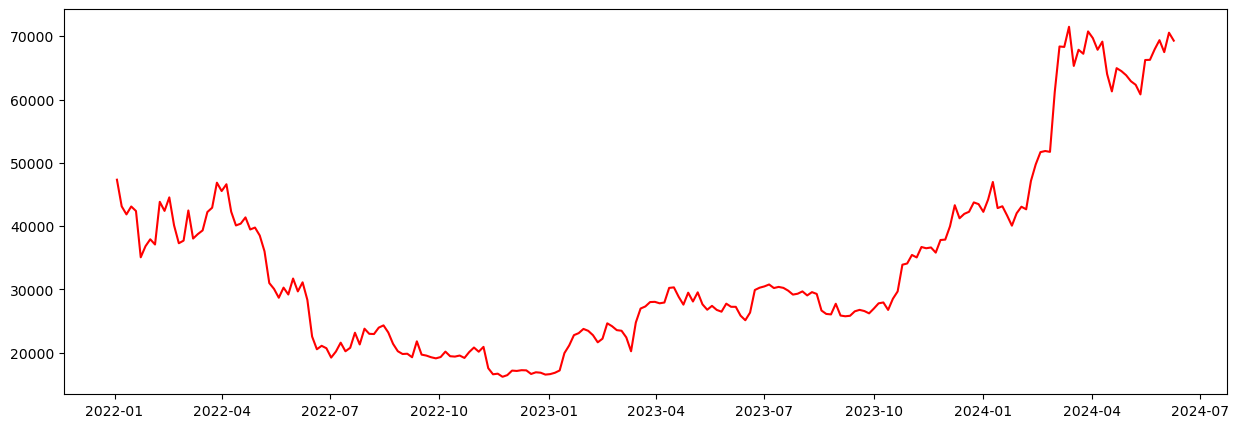

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(bitcoin_df['2022-01-01':], c='red')
plt.show()

In [35]:
bitcoin_df = bitcoin_df['2022-01-01':]
bitcoin_df

,y
x,
2022-01-03,47327.87
2022-01-07,43120.63
2022-01-11,41849.00
2022-01-15,43099.37
2022-01-19,42381.48
...,...
2024-05-24,67942.23
2024-05-28,69374.17
2024-06-01,67484.93


In [36]:
pre_b_df = bitcoin_df.reset_index()
pre_b_df

,x,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [37]:
# prophet 모델을 사용하기 위해 시계열 인덱스를 ds 라는 독립변수로 선언해줘야 한다.
pre_b_df = pre_b_df.rename(columns={'x': 'ds'})
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [38]:
from prophet import Prophet

model = Prophet().fit(pre_b_df)

14:32:50 - cmdstanpy - INFO - Chain [1] start processing
14:32:50 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][680:]

# 실제로 예측한 값이 정확하지 않을 수 있으며 그렇기 때문에 신뢰구간을 주의 깊게 봐야한다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# 하이퍼파라미터 조정 전
# ds	         yhat           yhat_lower      yhat_upper
# 2025-06-06	116087.501930	104972.449874	127188.084807
# 2025-06-07	115573.063026	103484.427767	127135.615952
# 2025-06-08	115323.828149	104620.372457	126015.221294
# 2025-06-09	115440.846442	103688.216681	126817.426327

# 하이퍼파라미터 조정 후 (changepoint_prior_scale=0.5, seasonality_prior_scale =0.1, seasonality_mode='multiplicative')
# 2025-06-06	128837.811314	66427.975008	191351.158523
# 2025-06-07	127132.862632	64177.353490	188220.047291
# 2025-06-08	125030.430129	64206.590098	185422.845779
# 2025-06-09	125139.097823	63196.548836	186034.721250


,ds,yhat,yhat_lower,yhat_upper
583,2025-06-05,115230.722218,104363.659334,125998.607983
584,2025-06-06,116087.501930,104972.449874,127188.084807
585,2025-06-07,115573.063026,103484.427767,127135.615952
586,2025-06-08,115323.828149,104620.372457,126015.221294
587,2025-06-09,115440.846442,103688.216681,126817.426327


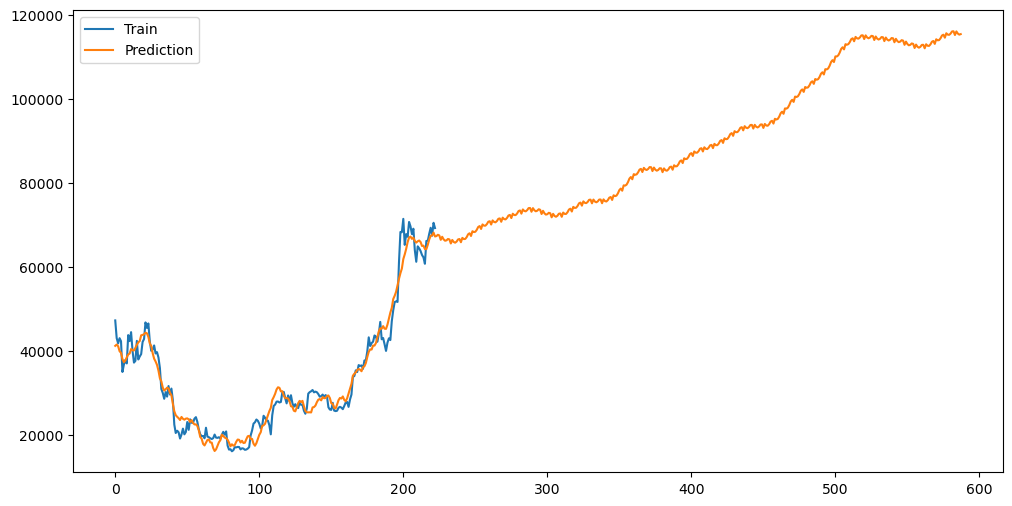

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

plt.plot(pre_b_df[['y']], label='Train')
plt.plot(forecast[['yhat']], label='Prediction')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


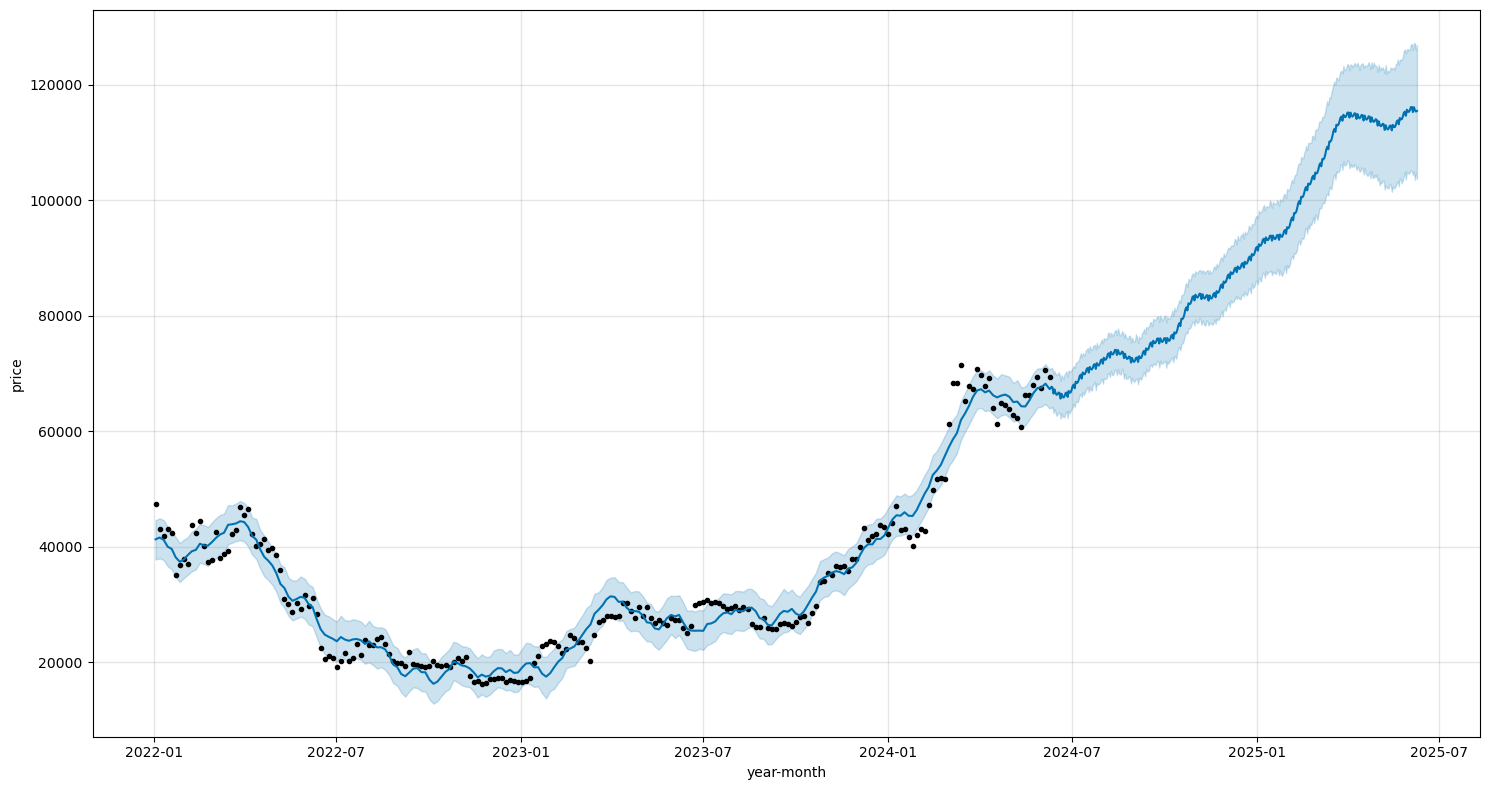

In [43]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

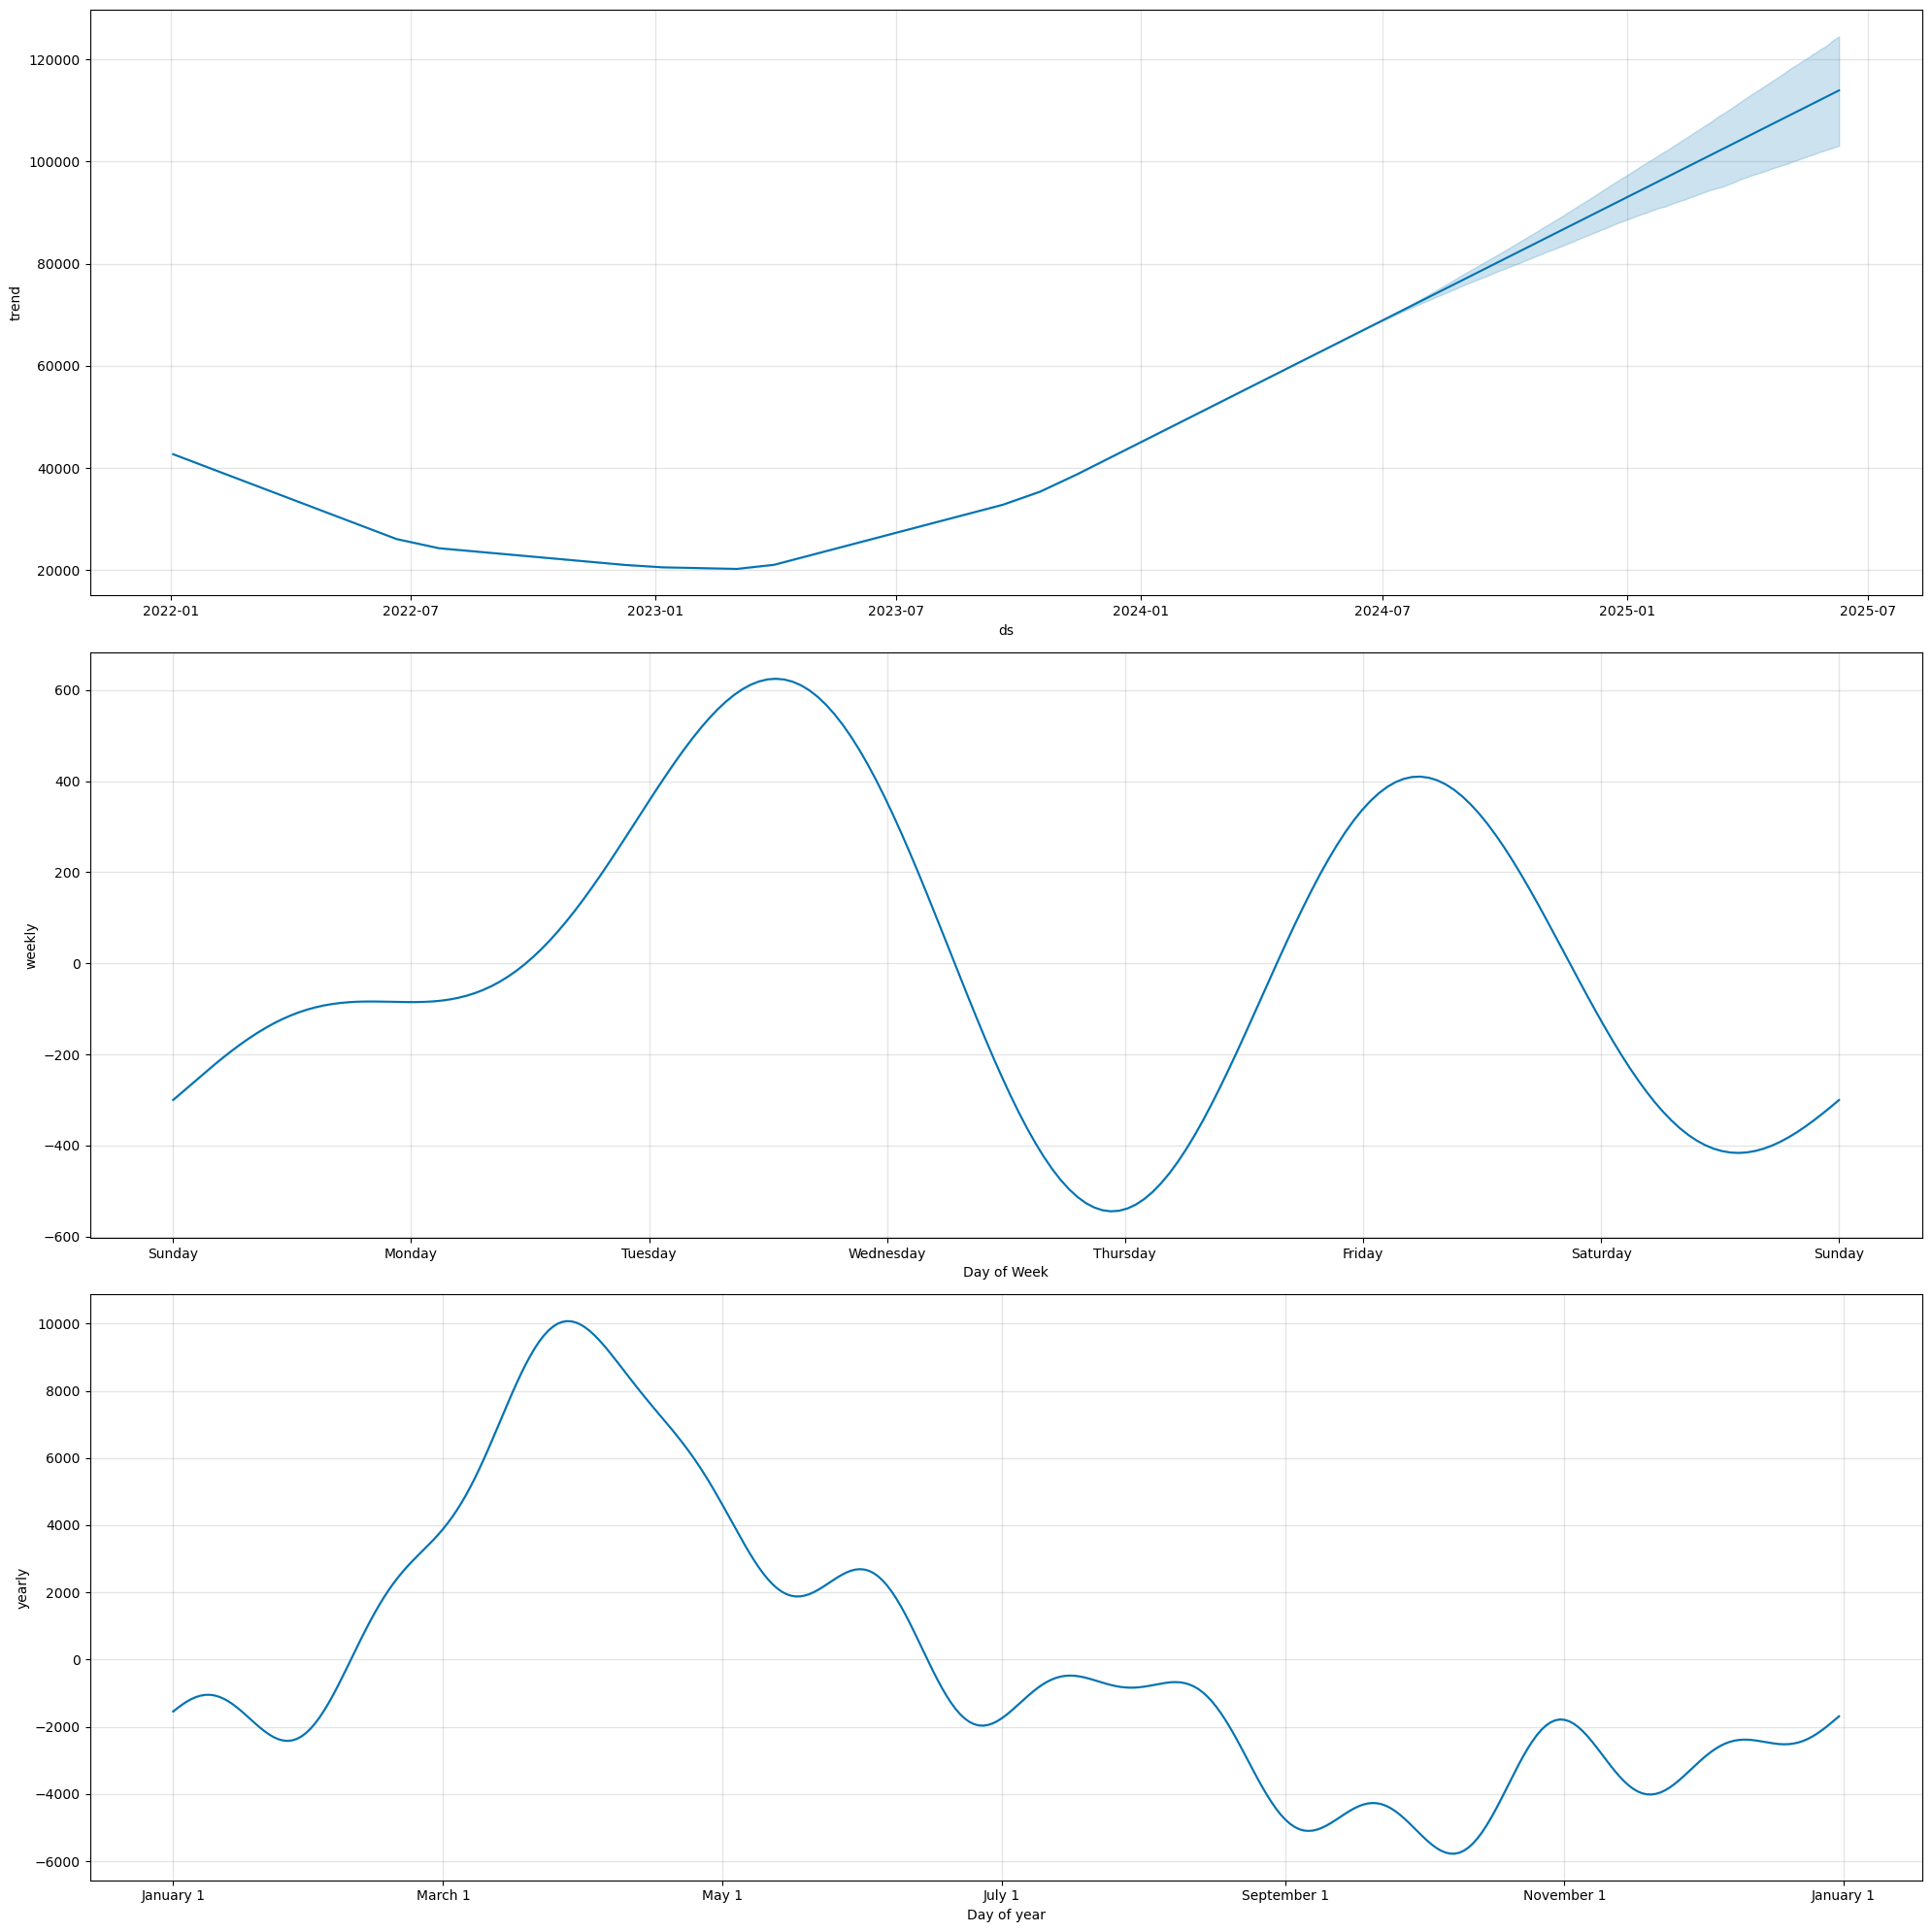

In [44]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()

# Prophet 심화
- 하이퍼파라미터 수정

In [45]:
pre_b_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
218,2024-05-24,67942.23
219,2024-05-28,69374.17
220,2024-06-01,67484.93
221,2024-06-05,70553.24


In [46]:
train_df = pre_b_df.iloc[:int(len(pre_b_df) * 0.8)]
train_df

,ds,y
0,2022-01-03,47327.87
1,2022-01-07,43120.63
2,2022-01-11,41849.00
3,2022-01-15,43099.37
4,2022-01-19,42381.48
...,...,...
173,2023-11-26,37800.94
174,2023-11-30,37867.37
175,2023-12-04,39976.04
176,2023-12-08,43298.70


In [47]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
import itertools

# changepoint_prior_scale: trend의 변화하는 크기를 반영하는 정도이다, 0.05가 default
# seasonality_prior_scale: 계절성을 반영하는 단위이다.
# seasonality_mode: 계절성으로 나타나는 효과를 더해 나갈지, 곱해 나갈지 정한다.
search_space = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# itertools.product(): 각 요소들의 모든 경우의 수 조합으로 생성
param_combinded = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]

train_len = int(len(pre_b_df) * 0.8)
test_len = int(len(pre_b_df) * 0.2)

train_size = f'{train_len} days'
test_size = f'{test_len} days'
train_df = pre_b_df.iloc[: train_len]
test_df = pre_b_df.iloc[train_len: ]

mapes = []
for param in param_combinded:
    model = Prophet(**param)
    model.fit(train_df)

    # 'threads' 옵션은 메모리 사용량은 낮지만 CPU 바운드 작업에는 효과적이지 않을 수 있다.
    # 'dask' 옵션은 대규모의 데이터를 처리하는 데 효과적이다.
    # 'processes' 옵션은 각각의 작업을 별도의 프로세스로 실행하기 때문에 CPU 바운드 작업에 효과적이지만,
    # 메모리 사용량이 높을 수 있다.
    cv_df = cross_validation(model, initial=train_size, period='20 days', horizon=test_size, parallel='processes')
    df_p = performance_metrics(cv_df, rolling_window=1)
    mapes.append(df_p['mape'].values[0])

tuning_result = pd.DataFrame(param_combinded)
tuning_result['mape'] = mapes       

14:36:21 - cmdstanpy - INFO - Chain [1] start processing
14:36:21 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] start processing
14:36:23 - cmdstanpy - INFO - Chain [1] done processing
14:36:23 - cmdstanpy - INFO - Chain 

In [48]:
tuning_result.sort_values(by='mape')

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mape
19,0.50,0.10,multiplicative,0.143265
17,0.50,0.05,multiplicative,0.143675
21,0.50,1.00,multiplicative,0.143685
23,0.50,10.00,multiplicative,0.143981
33,5.00,0.05,multiplicative,0.145087
41,10.00,0.05,multiplicative,0.145200
35,5.00,0.10,multiplicative,0.145326
16,0.50,0.05,additive,0.145332
39,5.00,10.00,multiplicative,0.145390
37,5.00,1.00,multiplicative,0.145424


In [49]:
# 최적의 하이퍼파라미터 값으로 model을 다시 훈련 시켜서 값을 확인 
model = Prophet(changepoint_prior_scale=0.5, 
                seasonality_prior_scale=0.1, 
                seasonality_mode='multiplicative')

model.fit(pre_b_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][221:]

14:38:25 - cmdstanpy - INFO - Chain [1] start processing
14:38:25 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
221,2024-06-05,70035.620067,67479.012318,72617.266393
222,2024-06-09,67489.213578,64900.881185,69906.309865
223,2024-06-10,67587.574051,65325.350985,70133.499923
224,2024-06-11,68983.153055,66560.641645,71399.623506
225,2024-06-12,68653.283626,66096.395399,71004.263599
...,...,...,...,...
583,2025-06-05,125561.763642,64261.993169,185045.518146
584,2025-06-06,128837.811314,66427.975008,191351.158523
585,2025-06-07,127132.862632,64177.353490,188220.047291
586,2025-06-08,125030.430129,64206.590098,185422.845779


In [50]:
# 시계열 데이터프레임으로 다시 만들어 시각화를 편하게 하기위하여 인덱스 재정의 후 데이터 프레임 재선언
b_df = pre_b_df.copy()
b_df.set_index('ds', inplace=True)

# 수업 
forecast_df = forecast.copy()
forecast_df = forecast_df.set_index('ds')

b_df.index = pd.to_datetime(b_df.index)
forecast_df.index = pd.to_datetime(forecast_df.index)

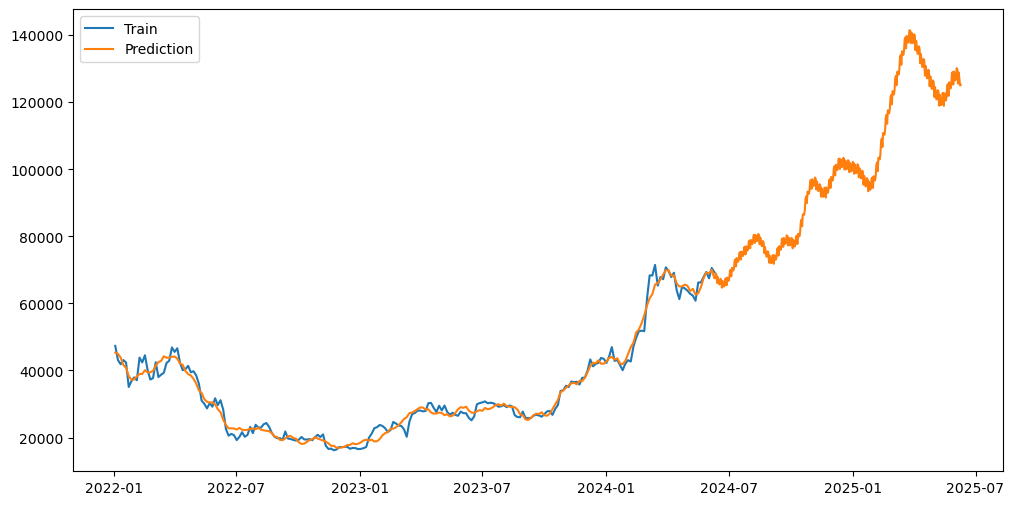

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(b_df[['y']], label='Train')
plt.plot(forecast_df[['yhat']], label='Prediction')
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


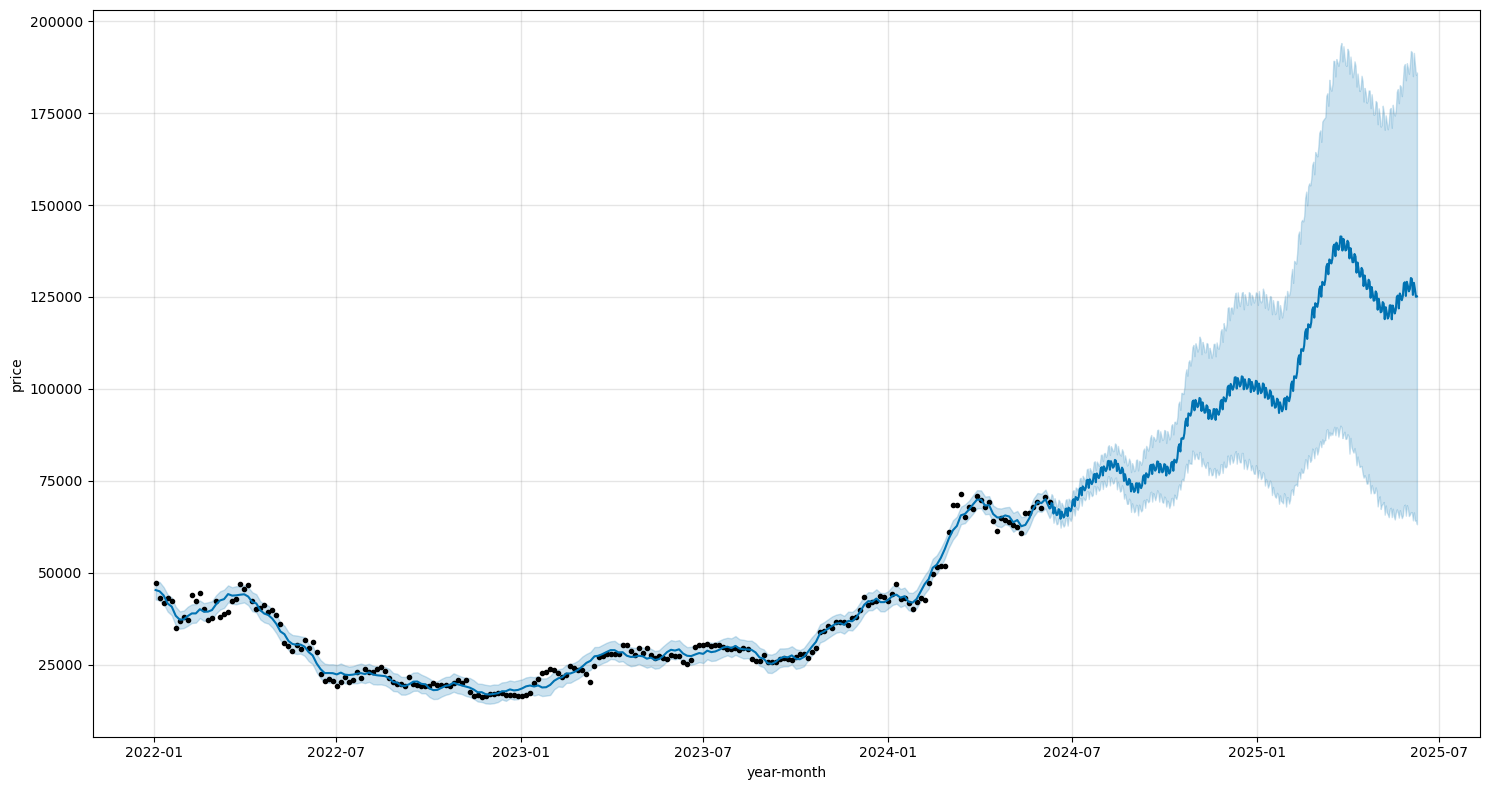

In [52]:
model.plot(forecast, figsize=(15, 8), xlabel='year-month', ylabel='price')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior,

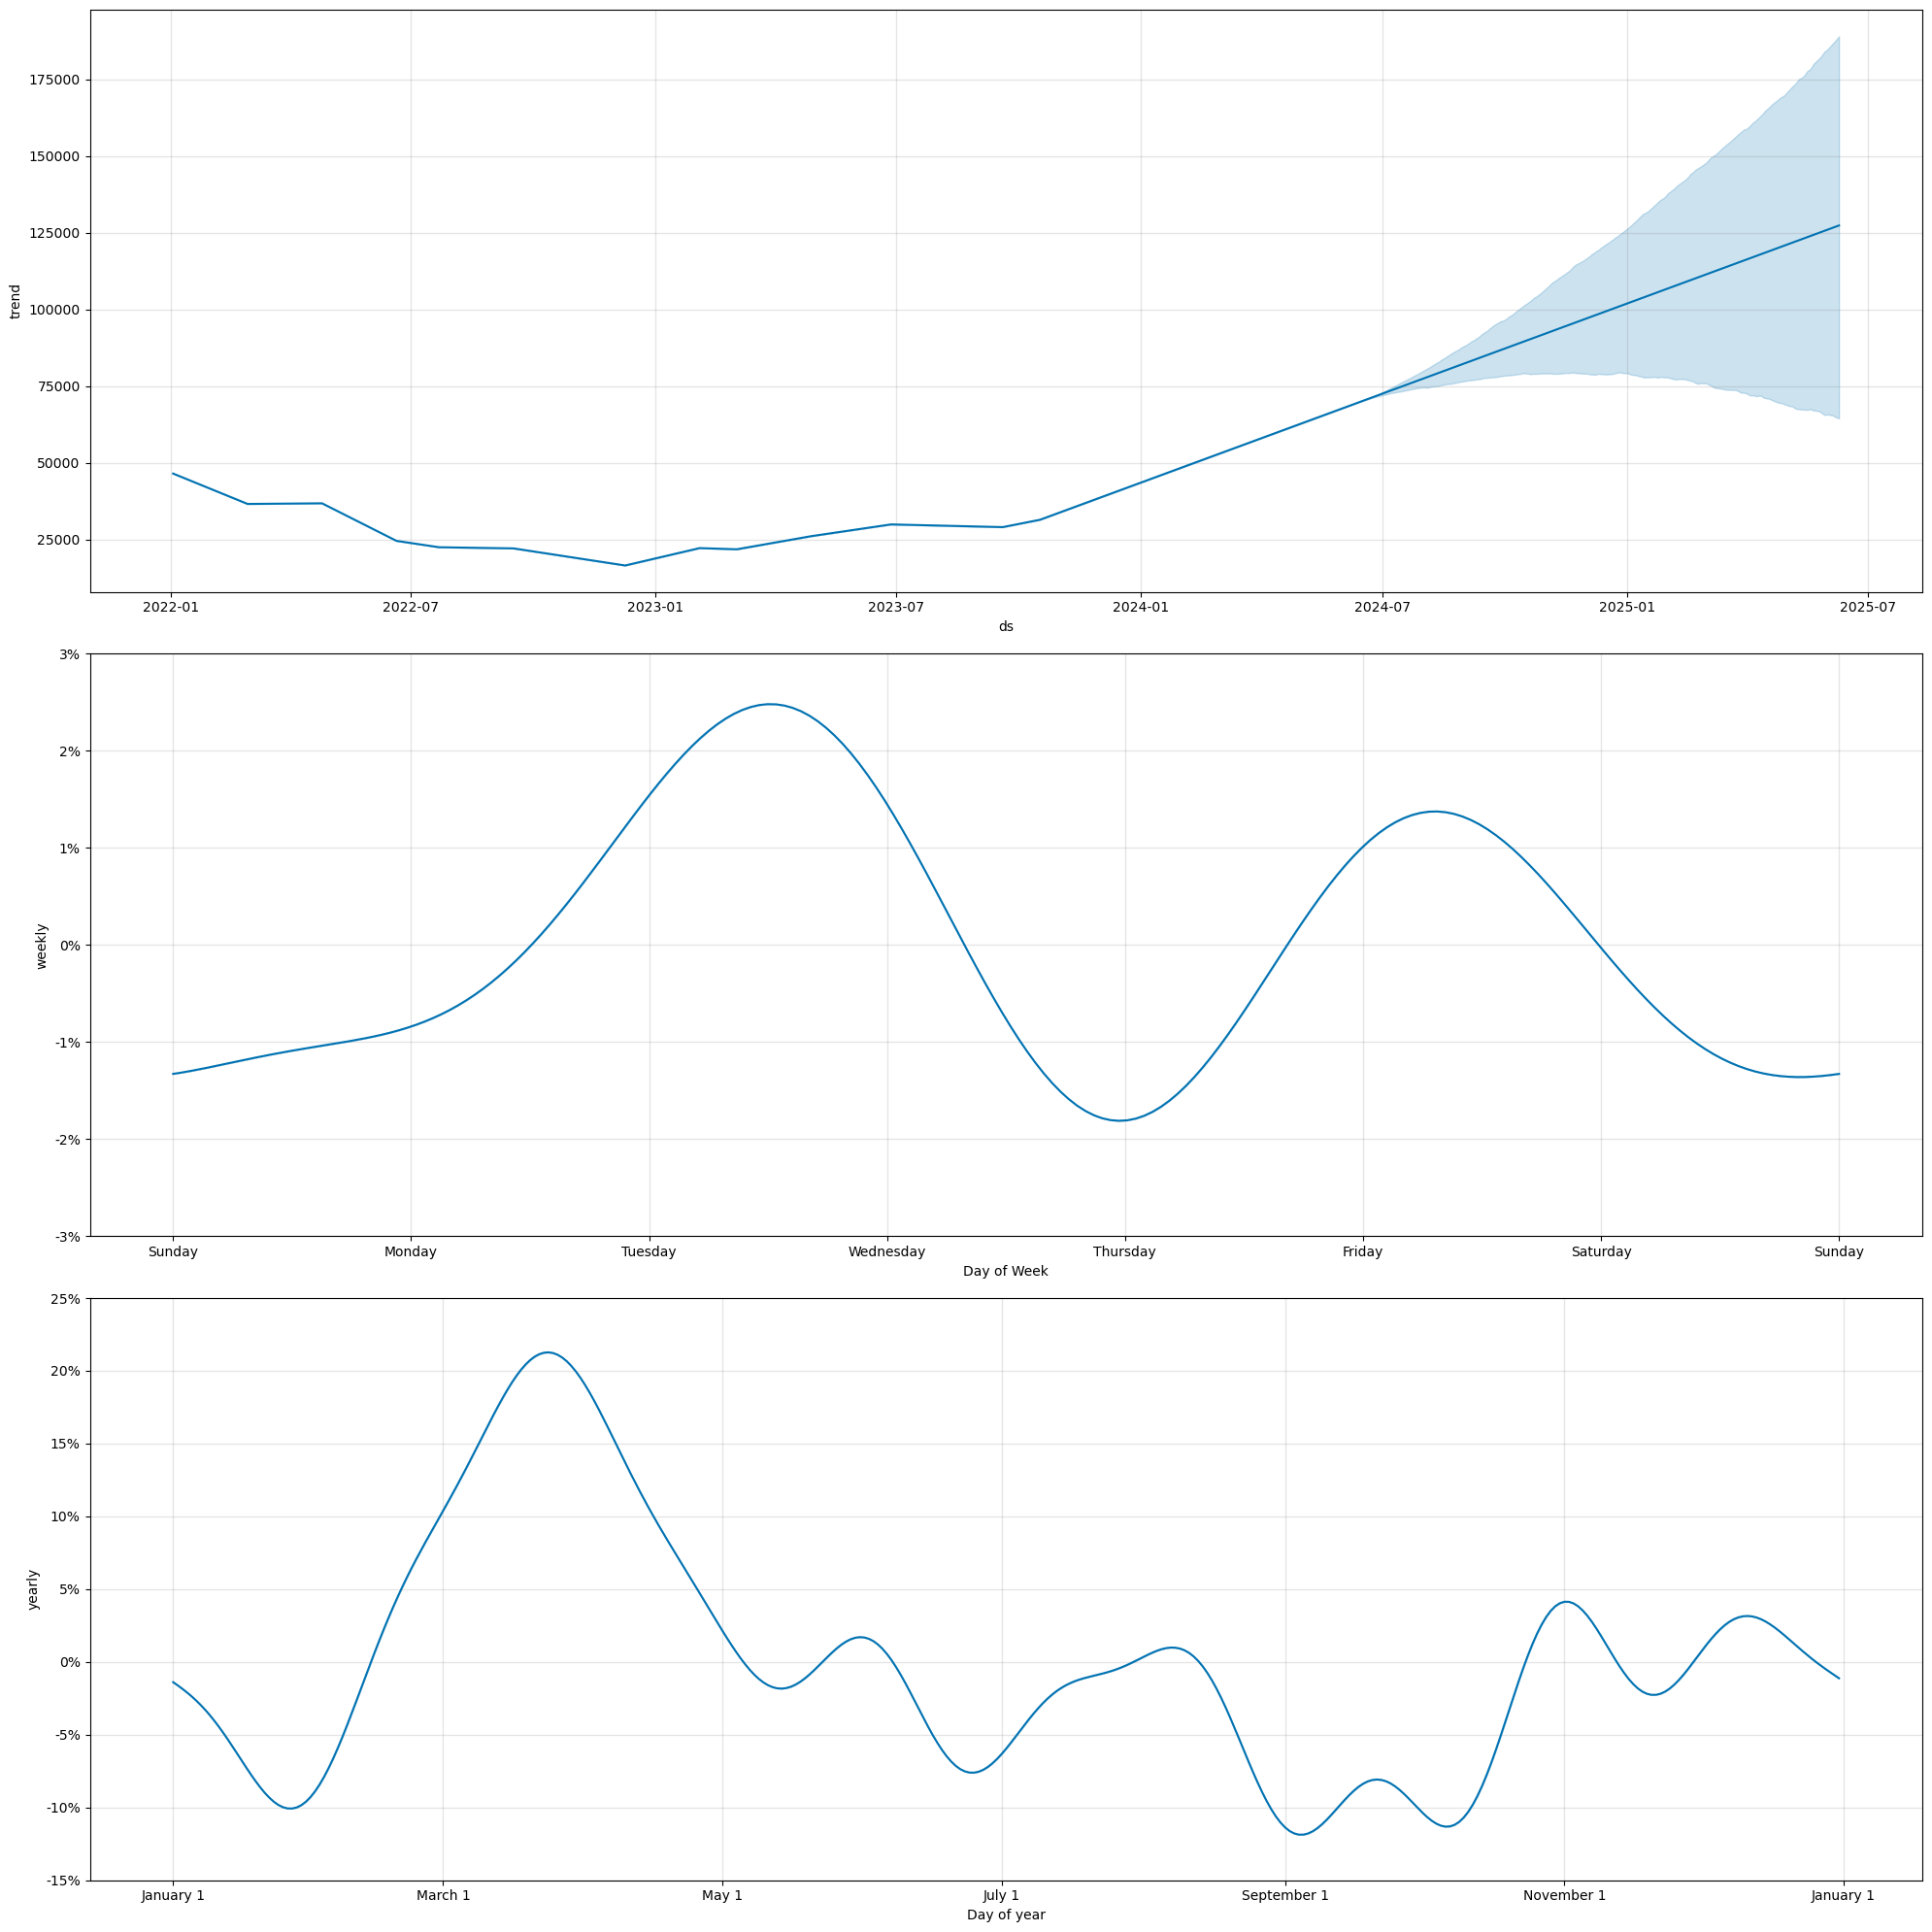

In [53]:
model.plot_components(forecast, figsize=(20, 20))
plt.show()